In [ ]:
//#include<TFile.h>
//#include<TH1.h>
//#include<TMath.h>
//#include<TLine.h>
//#include<TPoint.h>
//#include<iostream>
//#include<string>
//#include<stdio.h>

In [1]:
TCanvas *c1 = new TCanvas("c1","The FillRandom example",200,10,700,900);

auto pad3 = new TPad("pad3","h_data",0.05,0.68,0.95,0.96);
auto pad1 = new TPad("pad1","The pad with the function",0.05,0.36,0.95,0.64);
auto pad2 = new TPad("pad2","The pad with the histogram",0.05,0.04,0.95,0.32);

pad1->Draw();
pad2->Draw();
pad3->Draw();

In [2]:
pad3->cd();
const Int_t n = 20;

TH1D *h_data = new TH1D("h_data", "h_data", n, 110, 140); // Histograma de datos.
h_data->SetBinContent(1, 0);
h_data->SetBinContent(2, 1);
h_data->SetBinContent(3, 0);
h_data->SetBinContent(4, 1);
h_data->SetBinContent(5, 1);
h_data->SetBinContent(6, 6);
h_data->SetBinContent(7, 7);
h_data->SetBinContent(8, 2);
h_data->SetBinContent(9, 22);
h_data->SetBinContent(10, 30);
h_data->SetBinContent(11, 27);
h_data->SetBinContent(12, 20);
h_data->SetBinContent(13, 13);
h_data->SetBinContent(14, 12);
h_data->SetBinContent(15, 9);
h_data->SetBinContent(16, 4);
h_data->SetBinContent(17, 2);
h_data->SetBinContent(18, 1);
h_data->SetBinContent(19, 1);
h_data->SetBinContent(20, 0);

h_data->SetBinError(1, 0.38974303 );
h_data->SetBinError(2, 0.536510944);
h_data->SetBinError(3, 0.529702604);
h_data->SetBinError(4, 0.642001867);
h_data->SetBinError(5, 0.969341516);
h_data->SetBinError(6, 1.47611344);
h_data->SetBinError(7, 1.69797957);
h_data->SetBinError(8, 3.28577447);
h_data->SetBinError(9, 5.40784931);
h_data->SetBinError(10, 9.10106468);
h_data->SetBinError(11, 9.73541737);
h_data->SetBinError(12, 5.55019951);
h_data->SetBinError(13, 3.57914758);
h_data->SetBinError(14, 2.77877331);
h_data->SetBinError(15, 3.23697519);
h_data->SetBinError(16, 4.3608489);
h_data->SetBinError(17, 5.77172089);
h_data->SetBinError(18, 3.38666105);
h_data->SetBinError(19, 2.98861837);
h_data->SetBinError(20, 1.58402085);
h_data->Draw("E1");
pad3->SetGridx();
pad3->SetGridy();

auto pdf = new TF1("pdf","[0]*(2*sqrt(2)*[2]*[1]*(sqrt(pow([2],2)*(pow([2],2)+pow([1],2))))/(TMath::Pi()*sqrt(pow([2],2)+(sqrt(pow([2],2)*(pow([2],2)+pow([1],2)))))))/((pow((pow(x,2)-pow([2],2)),2))+(pow([2],2)*pow([1],2)))",110,140); //Función de Densidad de Probabilidad.
pdf->SetParameters(1,h_data->GetStdDev(),h_data->GetMean());
pdf->SetParNames ("Constant","Standard deviation","Mean");
h_data->Fit("pdf","R"); // Puede usarse V para agregar más detalles estadísticos.
pdf->SetTitle("Fit");

//c1->Update();

 FCN=32.6657 FROM MIGRAD    STATUS=CONVERGED     271 CALLS         272 TOTAL
                     EDM=2.72192e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.7 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.33652e+02   2.59492e+01  -9.93462e-02   2.94535e-05
   2  Standard deviation   4.49854e+00   7.37297e-01   2.10695e-03   1.28925e-03
   3  Mean         1.25833e+02   4.68924e-01  -1.25937e-03  -1.40816e-04


In [3]:
//pad2->cd();
TH1D *h_data_f = new TH1D("h_data_f","Test random numbers",n,110,140);

//h_data_f->SetTitle("Weighted Histogram");
//h_data_f->SetFillColor(45);
h_data_f->SetLineColor(kGreen);

Double_t minx = pdf->GetXmin(); // Mínimo en x del ajuste.
Double_t maxx = pdf->GetXmax(); // Máximo en x del ajuste.
Double_t mode_x = pdf->GetMaximumX(minx,maxx); // Coordenada x del máximo en el ajuste dentro del intervalo [minx,maxx].


for (int i=0; i<n; i++) {
    Double_t x_DH = 0.0; // Coordenada x en la distribución coincidente con lo alto de un bin.
    
    if (mode_x>=minx && mode_x>=h_data->GetXaxis()->GetBinCenter(i)) {
        x_DH = pdf->GetX(h_data->GetBinContent(i),minx,mode_x);
        //cout << x_DH << ",         1,"<< i << endl;
    }
    else {
        x_DH = pdf->GetX(h_data->GetBinContent(i),mode_x,maxx);
        //cout << x_DH << ",         2,"<< i << endl;
    }
    
    if (isnan(x_DH)) x_DH = 0;
    
    h_data_f->SetBinContent(i+1,pdf->Eval(x_DH));
    /*TLine *l1 = new TLine(x_DH,h_data->GetBinContent(i),h_data->GetXaxis()->GetBinCenter(i),h_data->GetBinContent(i));
    //l1->SetLineColor(kGreen);
    l1->SetLineStyle(7);
    l1->Draw("same");*/
    //cout << "(" << x_DH << "," << pdf->Eval(x_DH)<< ")" << endl;
}

h_data_f->Draw("E1 same");

c1->Update();

Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 110 xmax = 125.833 npts = 100
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Error in <TF1::GetX>: [110.000000,125.833399] is not a valid interval
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 110 xmax = 125.833 npts = 100
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Error in <TF1::GetX>: [110.000000,125.833399] is not a valid interval
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 110 xmax = 125.833 npts = 100
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Error in <TF1::GetX>: [110.000000,125.833399] is not a valid interval


In [4]:
pad1->cd();
pad1->SetGridx();
pad1->SetGridy();
pad1->GetFrame()->SetBorderMode(-1);
pad1->GetFrame()->SetBorderSize(5);
pdf->SetLineColor(4);
pdf->SetLineWidth(6);
pdf->Draw();
c1->Update();

In [5]:
// TFile myfile("fillrandom.root","RECREATE");
// pdf->Write();
// h_data_f->Write();

In [6]:
/*//apply the chi2 test and retrieve the residuals
Double_t res[n], x[20];
h_data->Chi2Test(h_data_f,"UW P",res);*/

In [7]:
/*    //Graph for Residuals
    for (Int_t i=0; i<n; i++) x[i]= 4.+i*12./20.+12./40.;
    TGraph *resgr = new TGraph(n,x,res);
    resgr->GetXaxis()->SetRangeUser(4,16);
    resgr->GetYaxis()->SetRangeUser(-3.5,3.5);
    resgr->GetYaxis()->SetTitle("Normalized Residuals");
    resgr->SetMarkerStyle(21);
    resgr->SetMarkerColor(2);
    resgr->SetMarkerSize(.9);
    resgr->SetTitle("Normalized Residuals");
 
    //Quantile-Quantile plot
    TF1 *f = new TF1("f","TMath::Gaus(x,0,1)",-10,10);
    TGraphQQ *qqplot = new TGraphQQ(n,res,f);
    qqplot->SetMarkerStyle(20);
    qqplot->SetMarkerColor(2);
    qqplot->SetMarkerSize(.9);
    qqplot->SetTitle("Q-Q plot of Normalized Residuals");
 
    //create Canvas
    TCanvas *c1 = new TCanvas("c1","Chistat Plot",10,10,700,600);
    c1->Divide(2,2);
 
    // Draw Histogramms and Graphs
    c1->cd(1);
    h_data->SetMarkerColor(4);
    h_data->SetMarkerStyle(20);
 
    h_data->Draw("E");
 
    c1->cd(2);
    h2->Draw("");
    h2->SetMarkerColor(4);
    h2->SetMarkerStyle(20);
 
    c1->cd(3);
    gPad->SetGridy();
    resgr->Draw("APL");
 
    c1->cd(4);
    qqplot->Draw("AP");
 
    c1->cd(0);
 
    c1->Update();
    return c1;*/

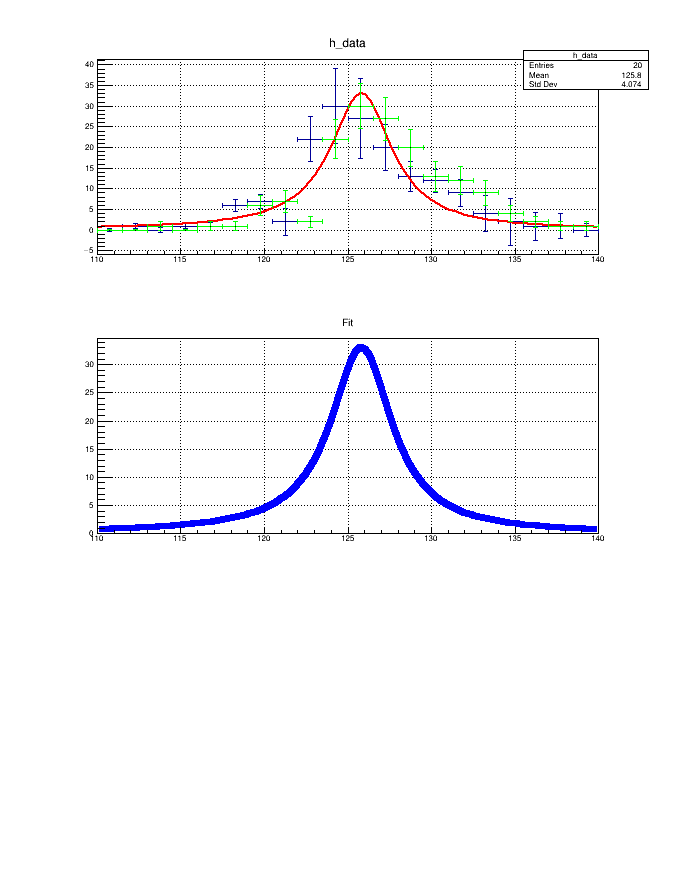

In [8]:
gROOT->GetListOfCanvases()->Draw()

https://root.cern/doc/v610/fillrandom_8C.html

https://root.cern/doc/v610/chi2test_8C_source.html